In [1]:
from source.util import utils as u
from source import metrics, plots
from source import handshake2, scargc, hs
import sys
import time
import os
import psutil
import resource

In [2]:
poolsize = 150
clusters = 2
n_components = 2
epsilon = 0.05
percent = 10
step = 100
k_h = 5
k_s = 3

In [3]:
base = '/home/god/Documentos/tcc/datasets/1CHT.txt'
dataset, data_labeled, dataset_train, l_train, stream, l_stream, n_features = u.criar_datasets(5, base)


Handshake

In [4]:
start = time.time()

predicted, updt, b = hs.handshake2(dataset, data_labeled, dataset_train, l_train, stream, l_stream, n_components, n_features, epsilon, percent, k_h)

end = time.time()
mem = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
tempo = end - start

SCARGC

In [5]:
percent = 20
poolsize = int( len(dataset_train)/100 * percent )

startScargc = time.time()

predictedS, updtS = scargc.scargc_1NN(dataset, data_labeled, dataset_train, l_train, stream, l_stream, poolsize, clusters, n_features, k_s)

endScargc = time.time()
memS = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss
tempoS = endScargc - startScargc

/home/god/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


In [6]:
acc_percent, f1_per, mcc_per = metrics.makeBatches(l_stream, predicted, len(stream), step)
score, f1, mcc, std = metrics.metrics(acc_percent, l_stream, predicted, step, f1_type = 'macro')

acc_percentScargc, f1_S, mcc_S = metrics.makeBatches(l_stream, predictedS, len(stream), step)
scoreS, f1S, mccS, stdS = metrics.metrics(acc_percentScargc, l_stream, predictedS, step, f1_type = 'macro')

Tempo de Execução:  21.198293447494507
memory peak:  133268
Acc:  0.994174799581736
Macro-F1:  0.9942105093763173
MCC:  0.9884268367252135
Desvio Padrão:  0.016598057676895428
Numero de atualizações:  314


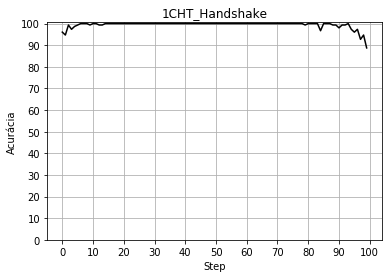

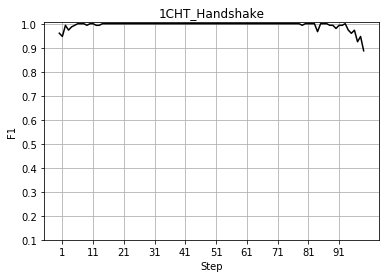

Tempo de Execução:  4.906146287918091
memory peak:  145432
Acc:  0.9953023701638202
Macro-F1:  0.9953289449221016
MCC:  0.9906589323908725
Desvio Padrão:  0.012658744501539953
Numero de atualizações:  15


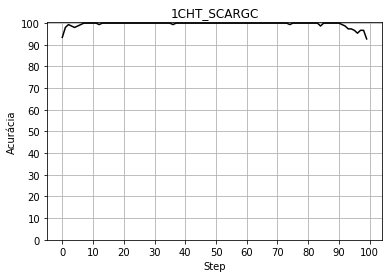

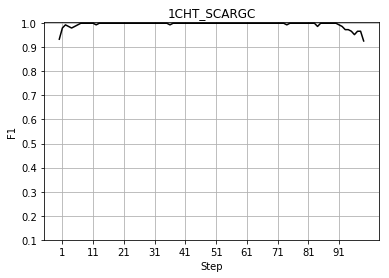

/home/god/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


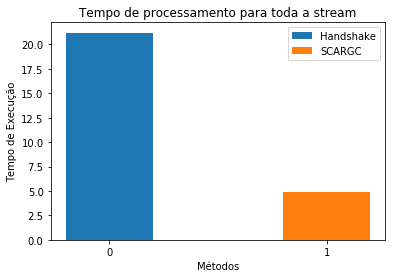

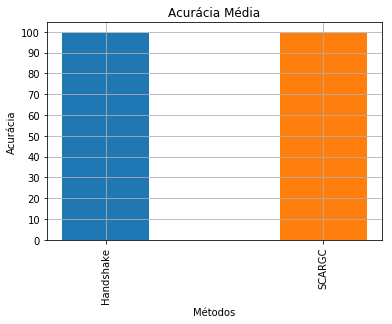

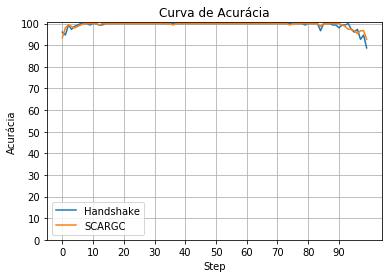

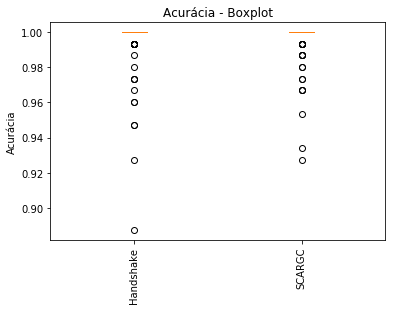

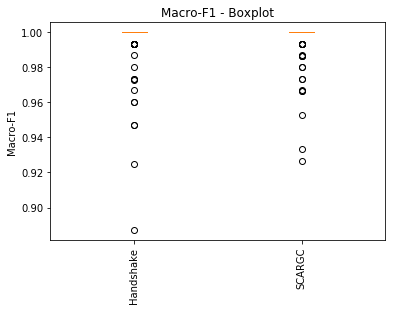

In [7]:
print('Tempo de Execução: ', tempo)
print('memory peak: ', mem)
print('Acc: ', score)
print('Macro-F1: ', f1)
print('MCC: ', mcc)
print('Desvio Padrão: ', std)
print('Numero de atualizações: ', updt)
plots.plotAcc(acc_percent, 100, '1CHT_Handshake')
plots.plotF1(f1_per, 100, '1CHT_Handshake')

print('Tempo de Execução: ', tempoS)
print('memory peak: ', memS)
print('Acc: ', scoreS)
print('Macro-F1: ', f1S)
print('MCC: ', mccS)
print('Desvio Padrão: ', stdS)
print('Numero de atualizações: ', updtS)
plots.plotAcc(acc_percentScargc, 100, '1CHT_SCARGC')
plots.plotF1(f1_S, 100, '1CHT_SCARGC')

listTime = [tempo, tempoS]
listAcc = [score, scoreS]
listMethod = ['Handshake', 'SCARGC']
matrixAcc = [acc_percent[0], acc_percentScargc[0]]
matrixF1 = [f1_per[0], f1_S[0]]

plots.plotTime(listTime, listMethod)
plots.plotAverageAcc(listAcc, listMethod)
plots.plotAccuracyCurves(matrixAcc, listMethod, step)
plots.plotBoxplot('acc', matrixAcc, listMethod)
plots.plotBoxplot('f1', matrixF1, listMethod)

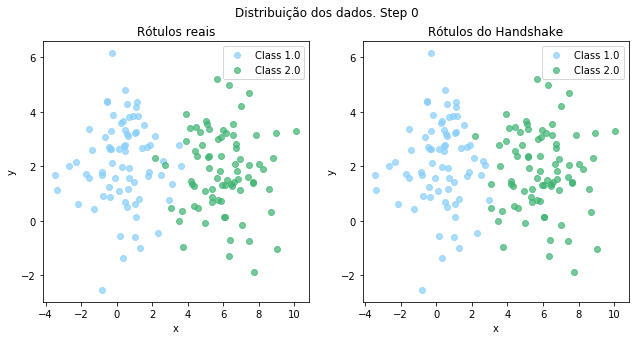

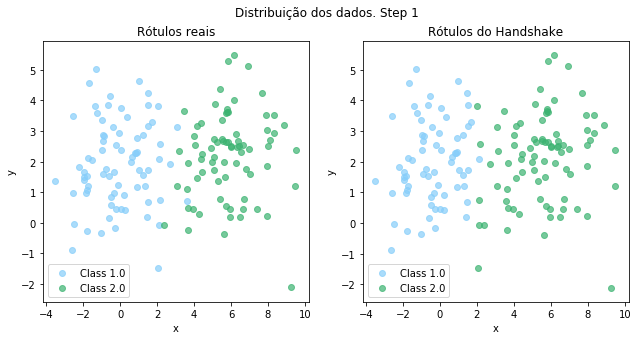

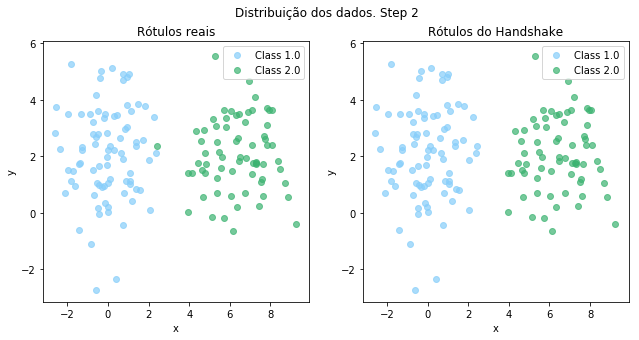

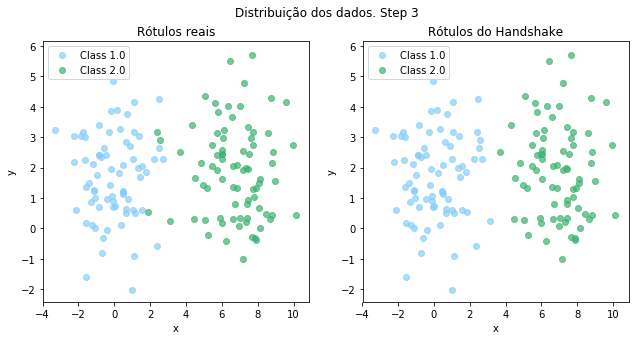

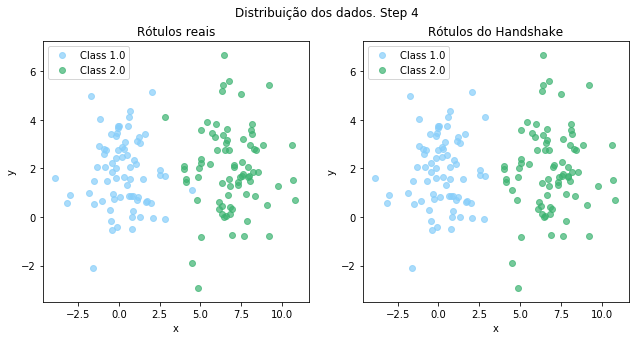

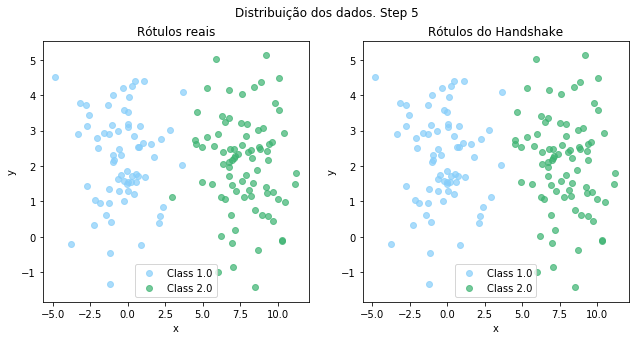

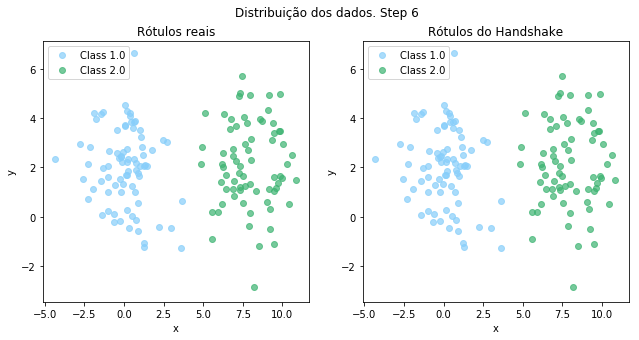

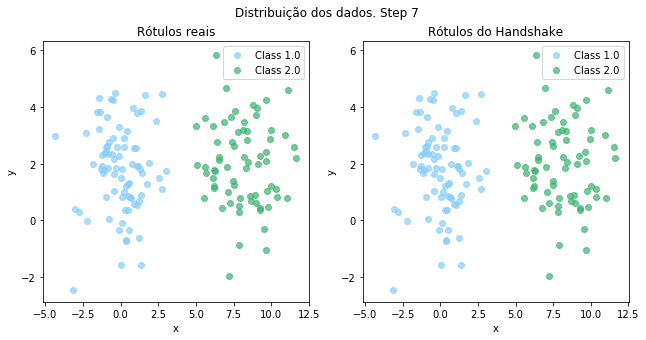

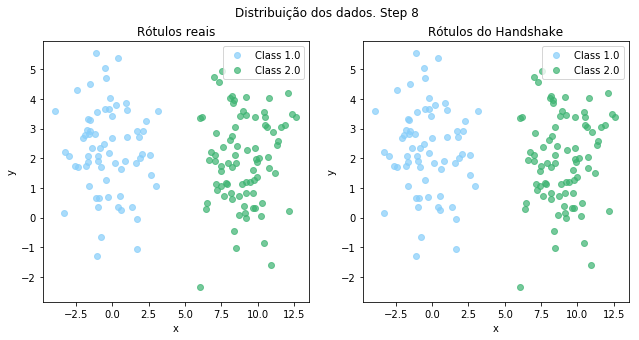

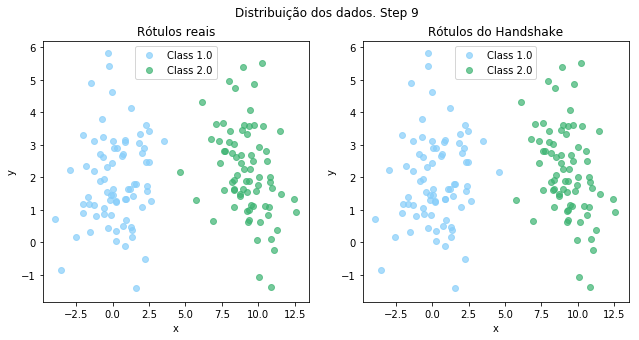

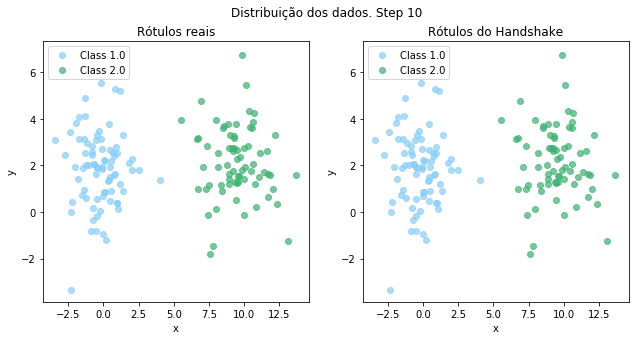

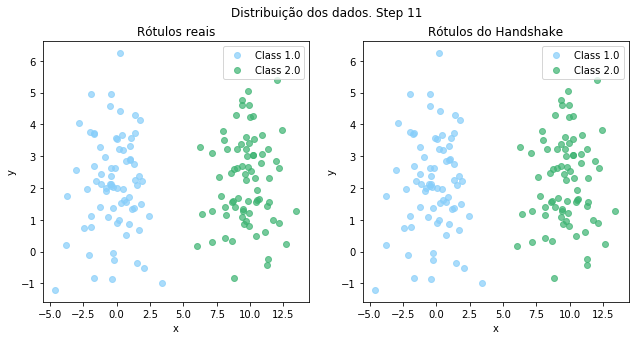

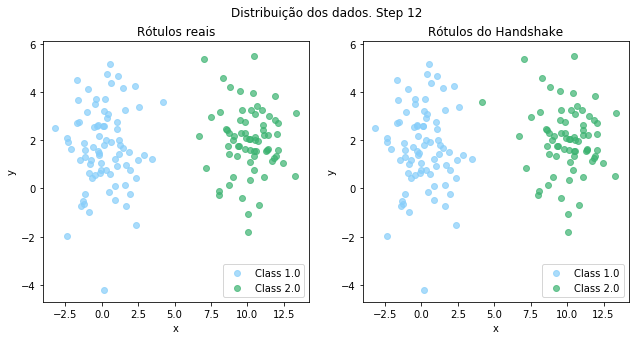

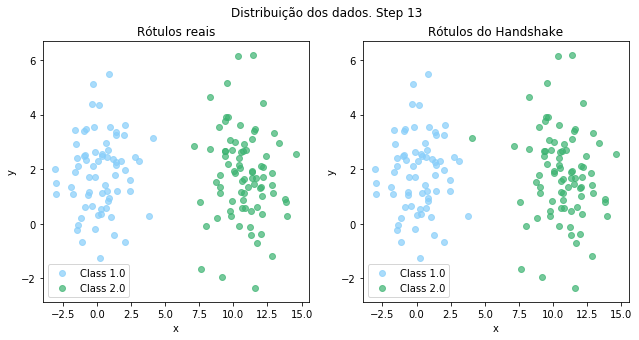

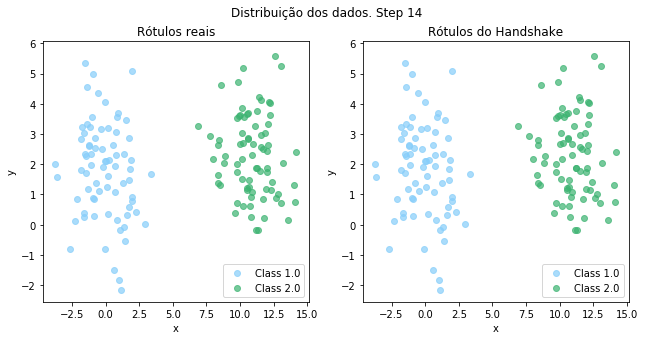

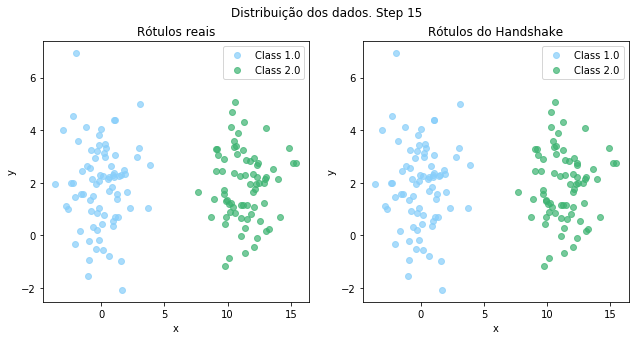

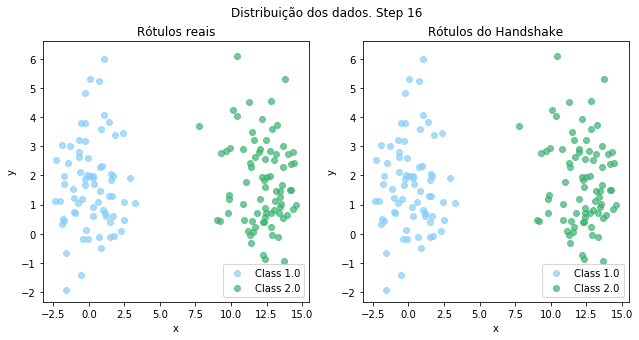

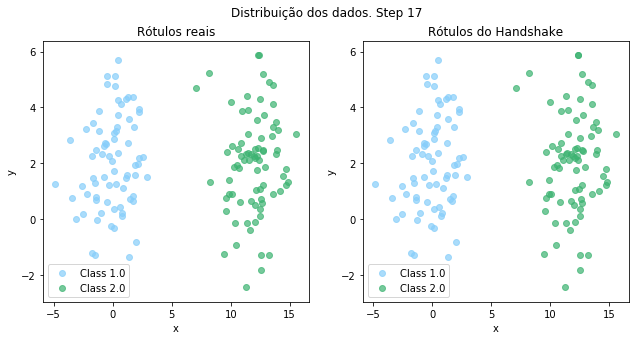

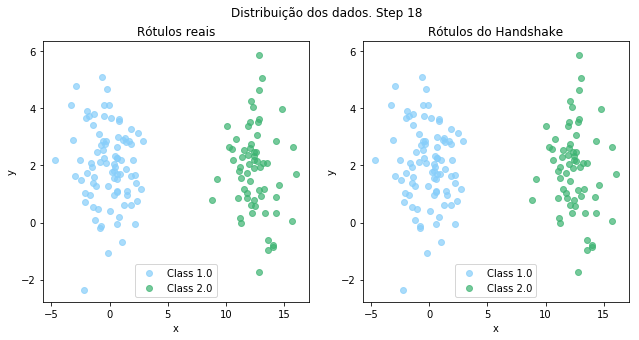

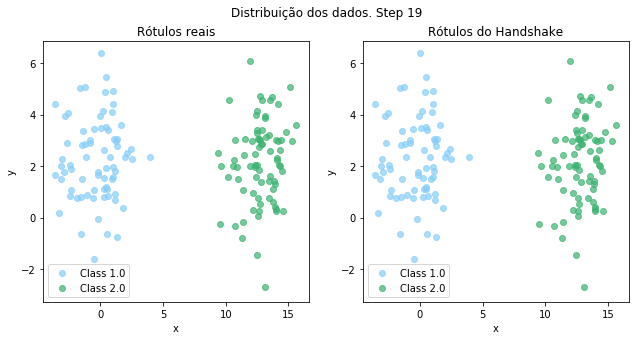

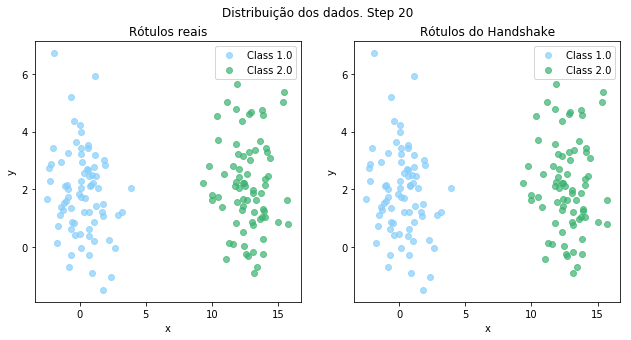

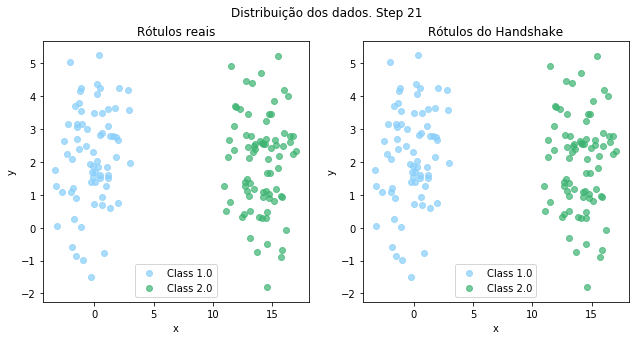

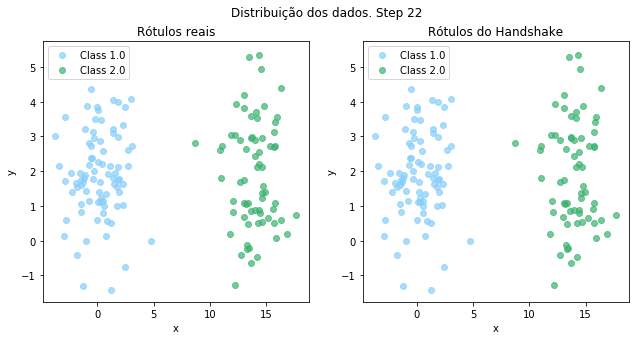

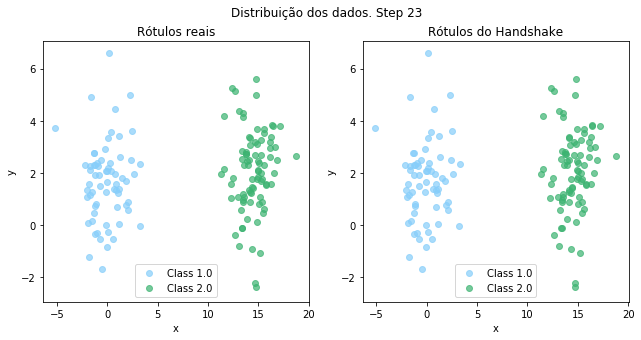

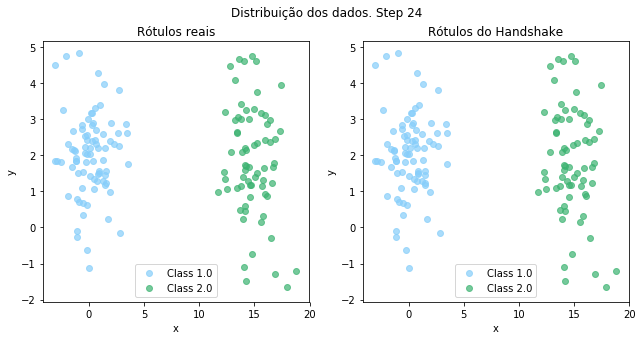

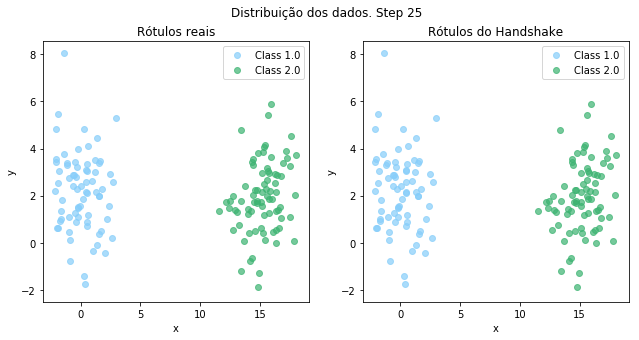

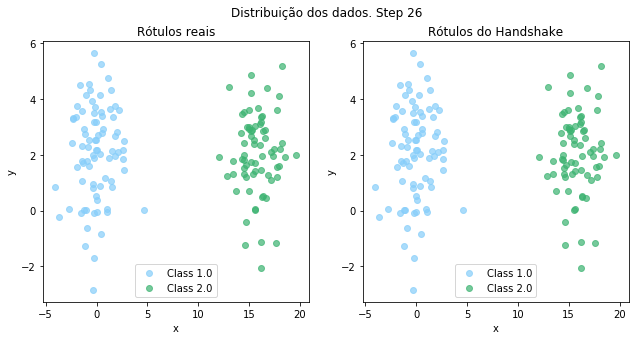

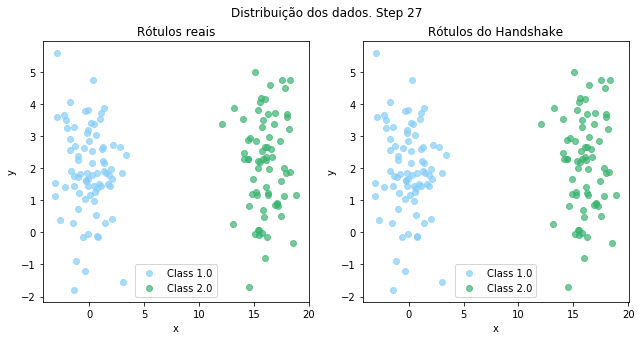

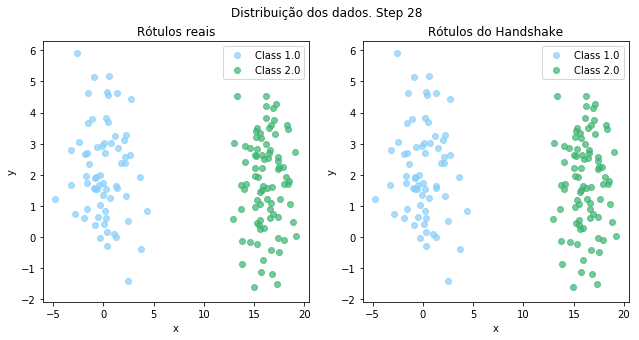

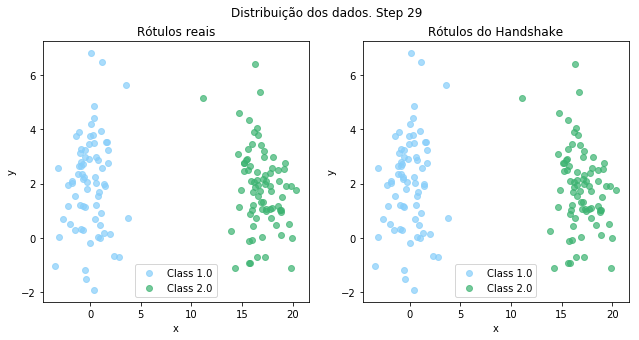

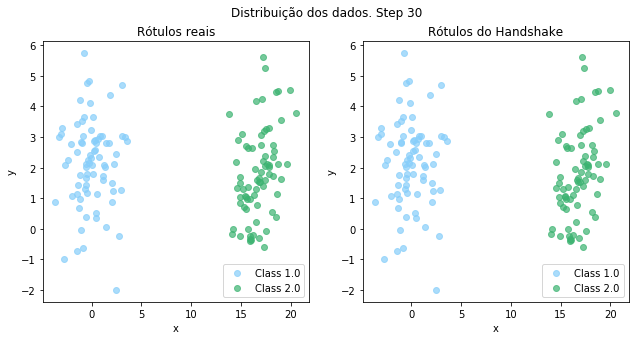

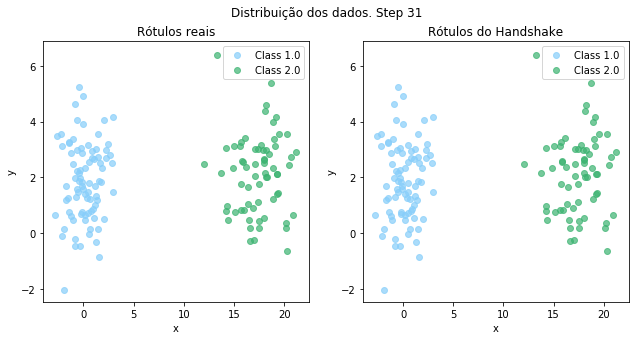

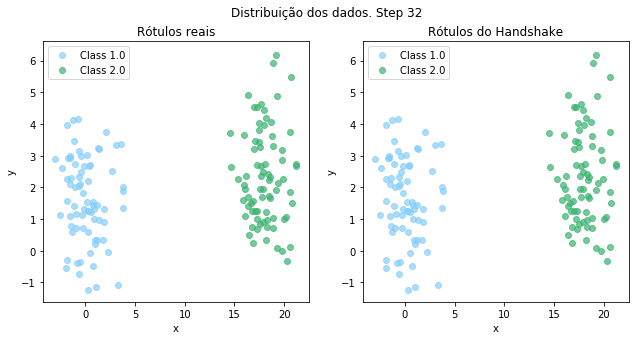

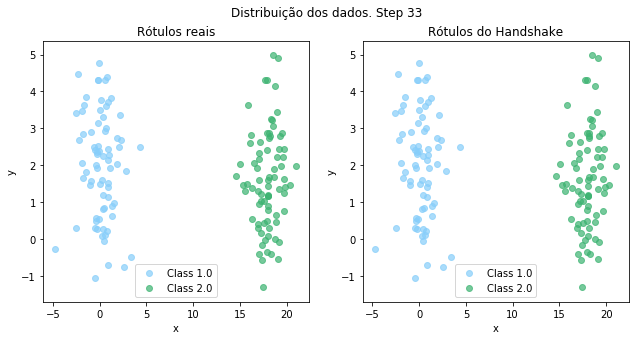

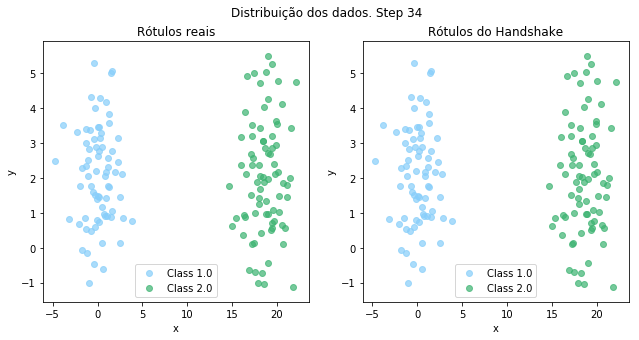

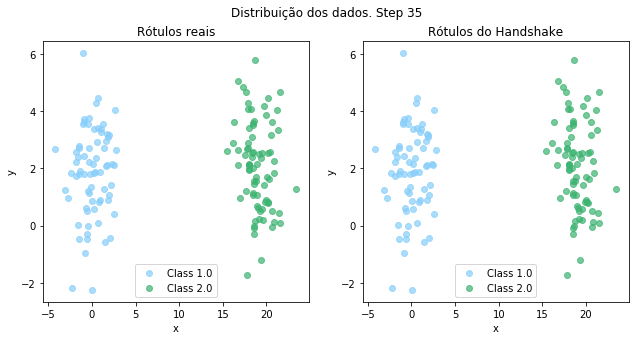

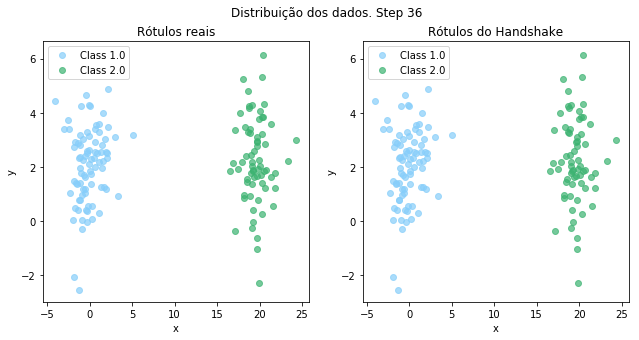

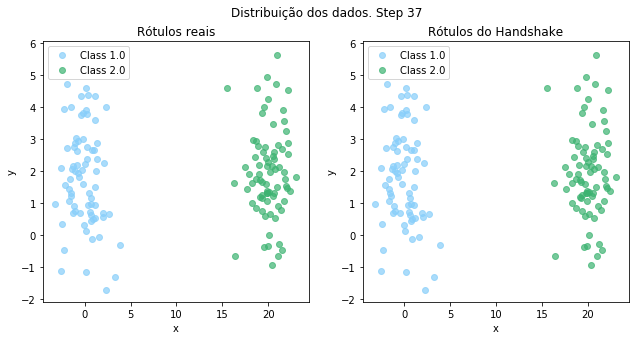

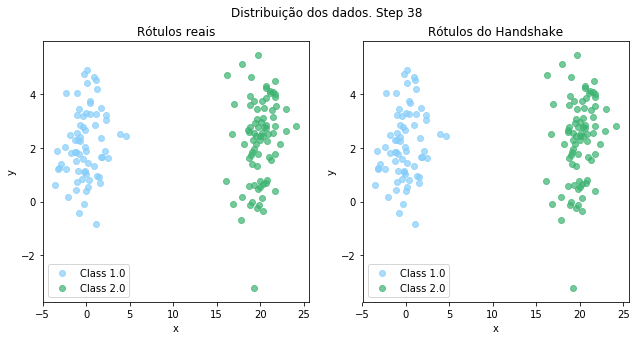

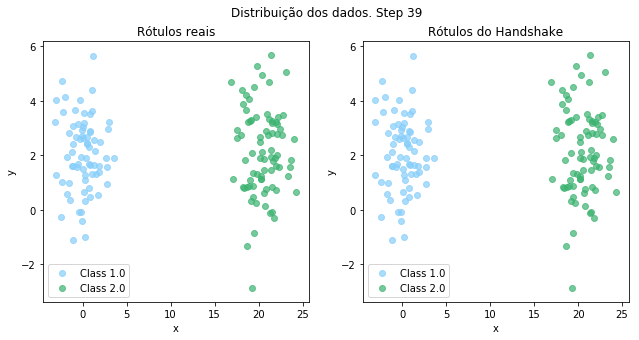

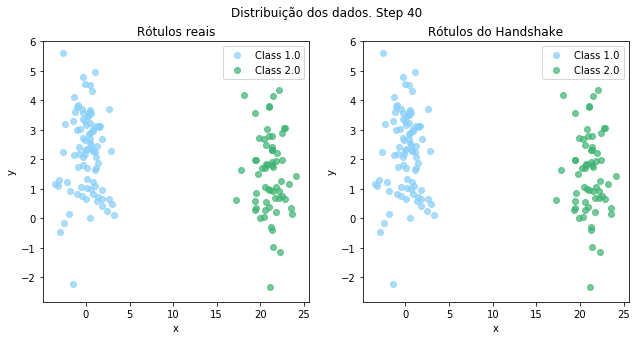

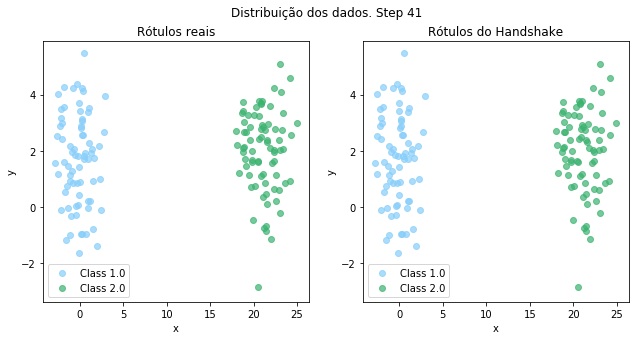

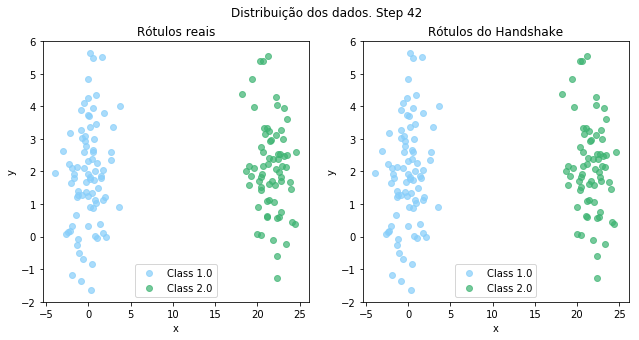

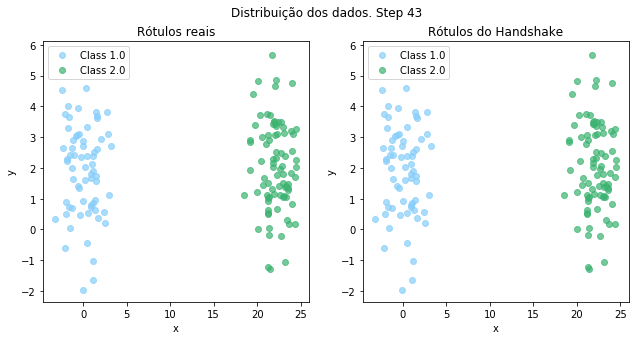

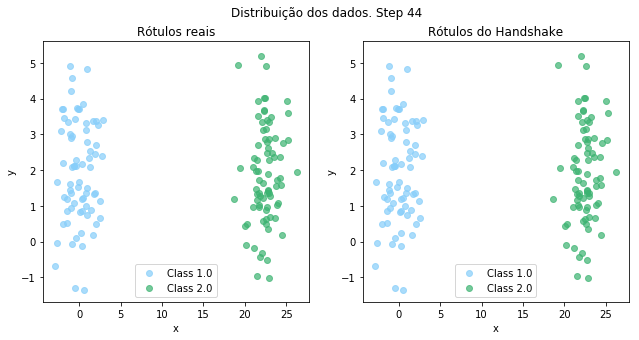

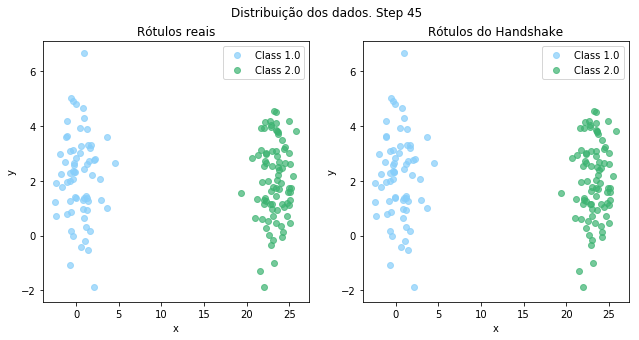

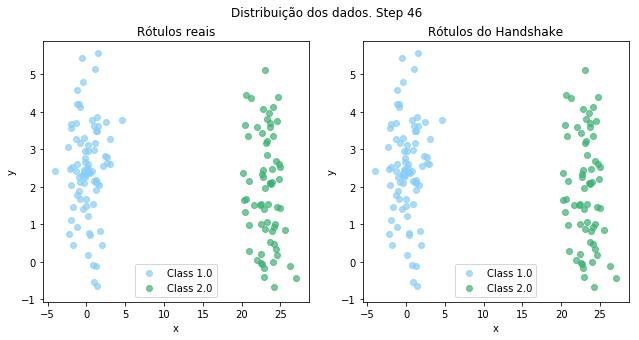

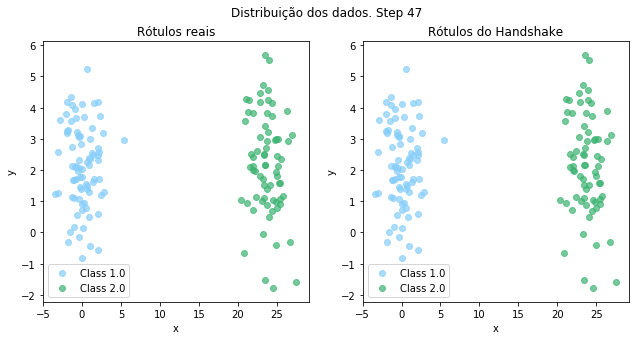

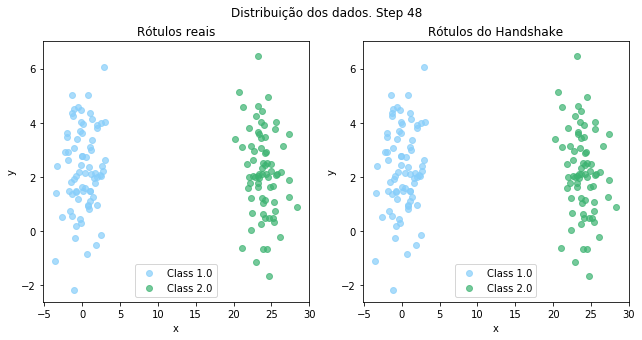

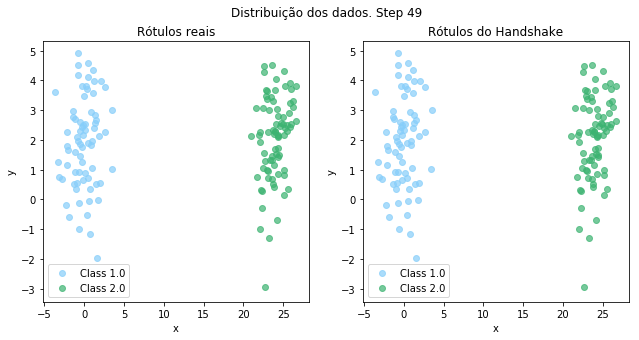

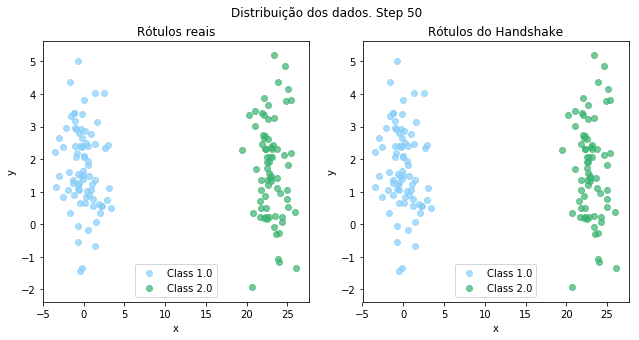

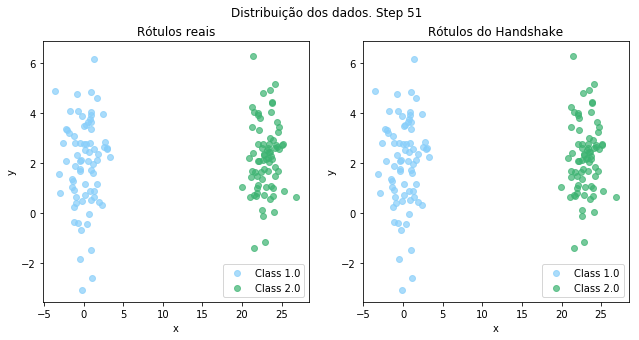

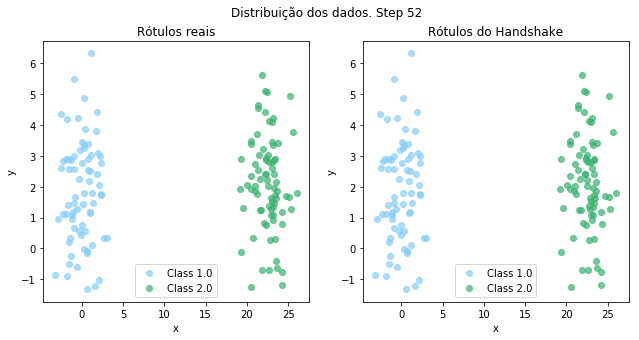

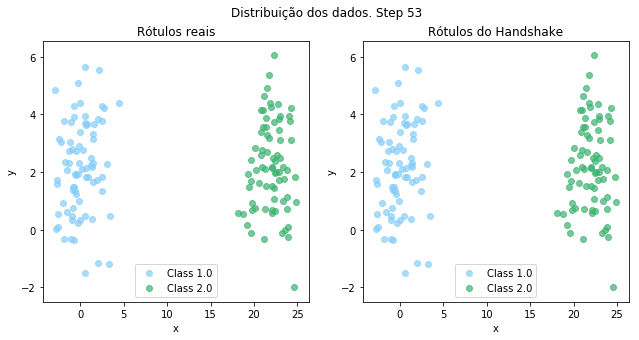

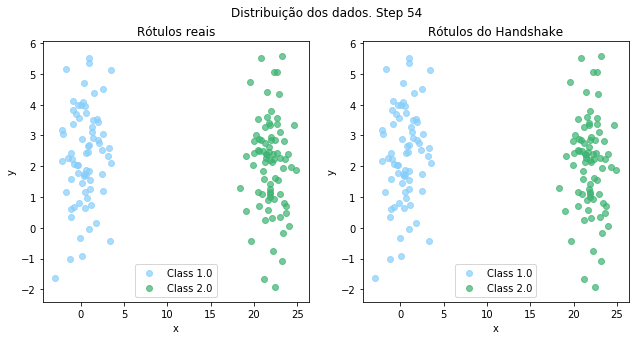

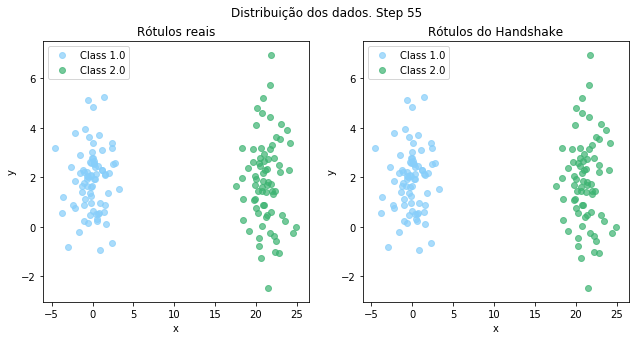

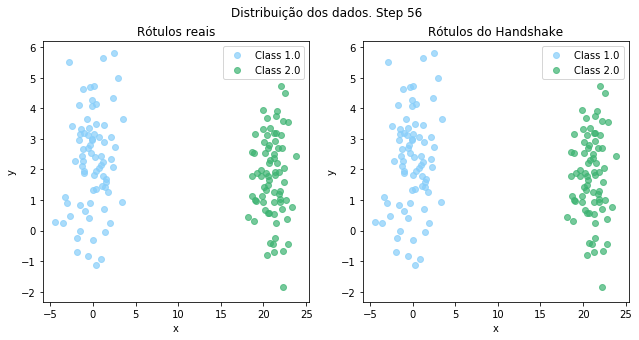

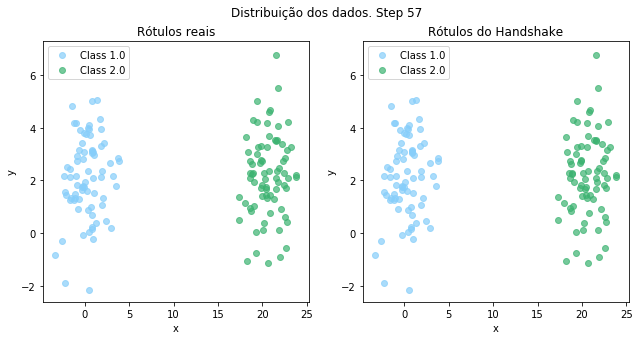

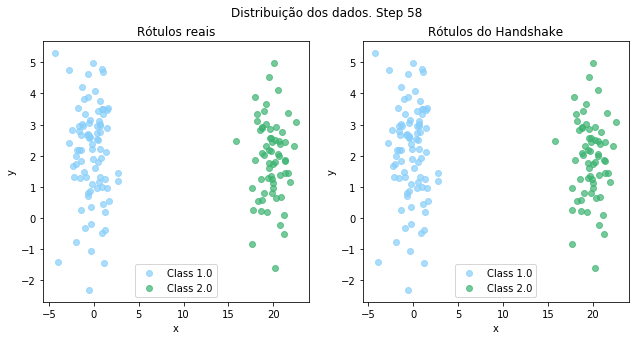

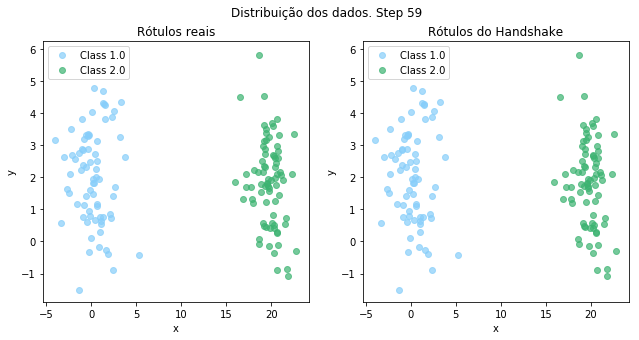

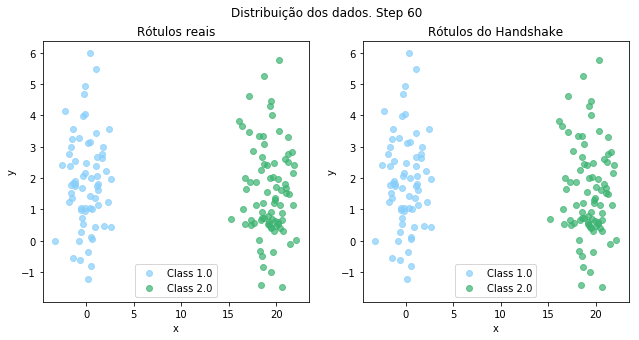

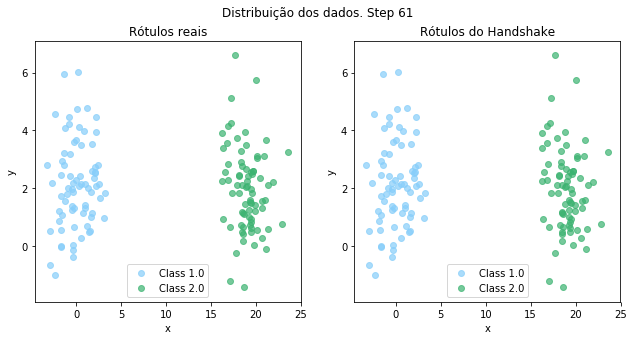

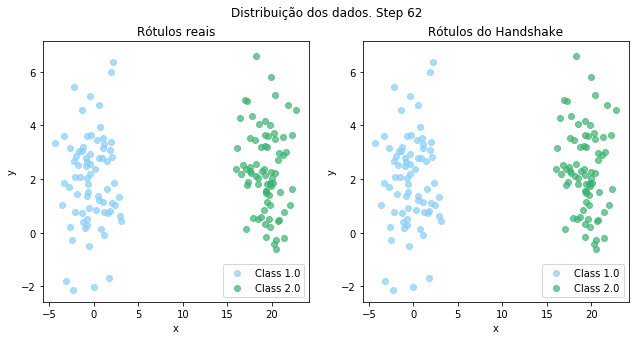

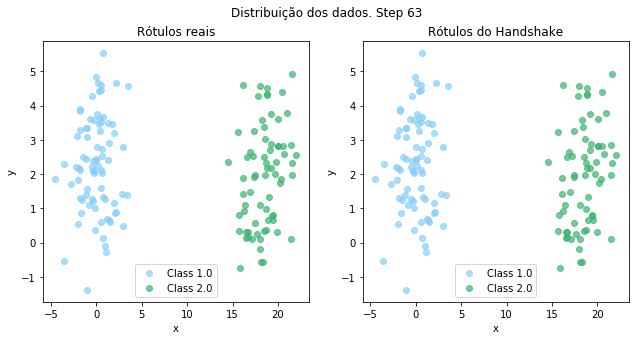

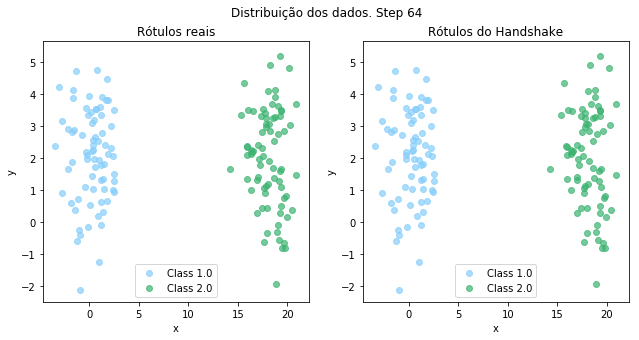

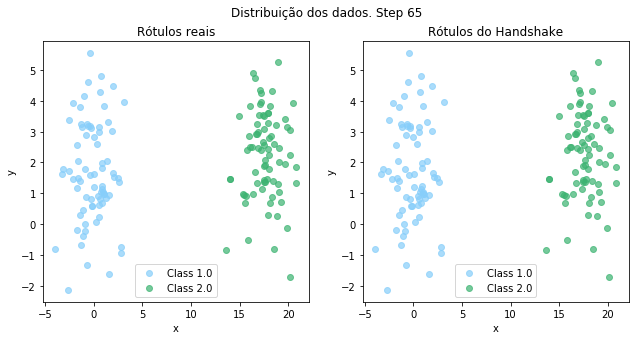

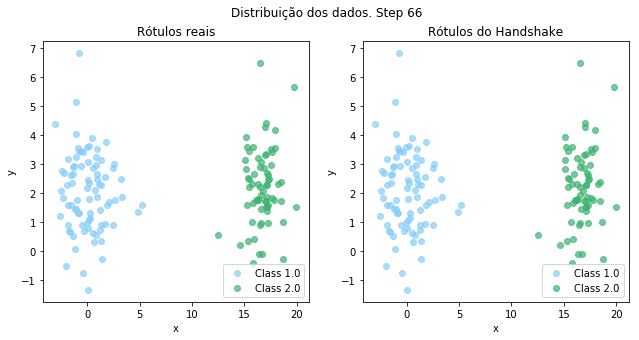

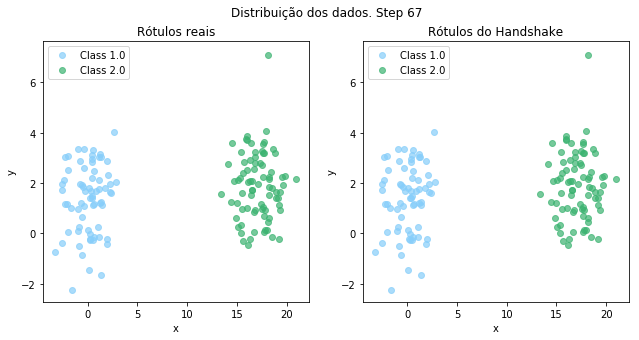

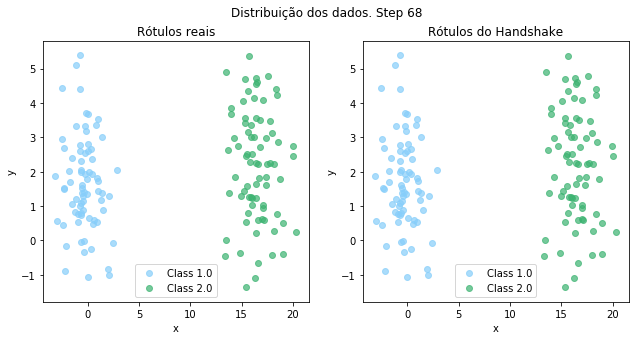

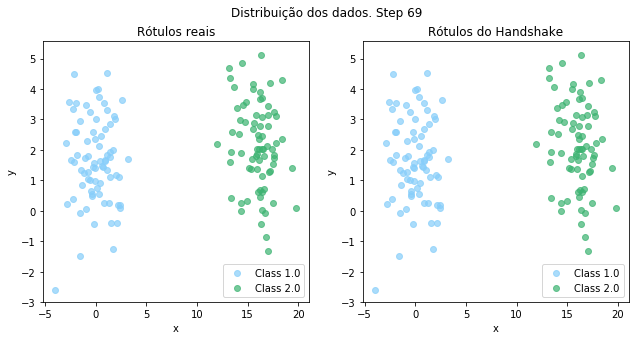

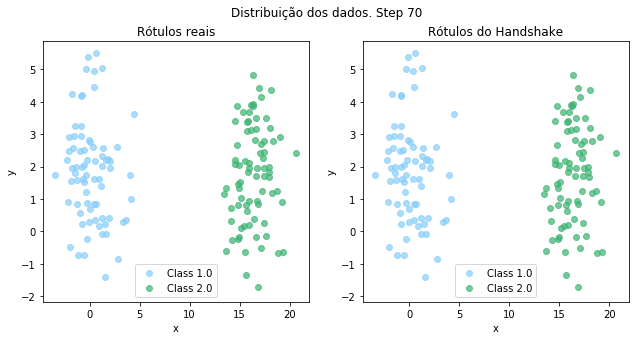

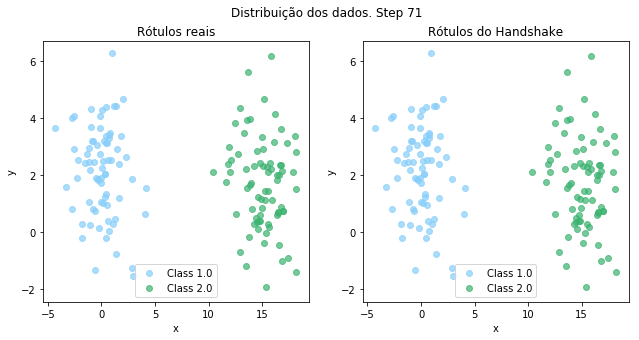

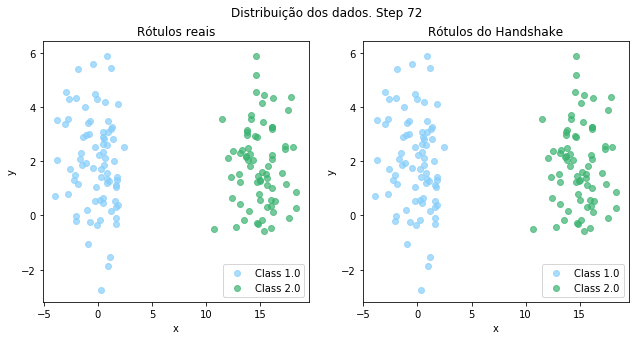

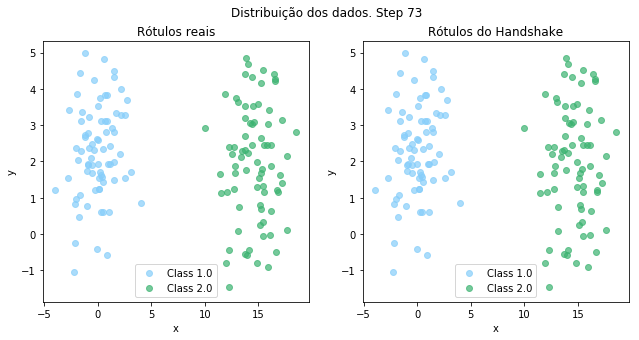

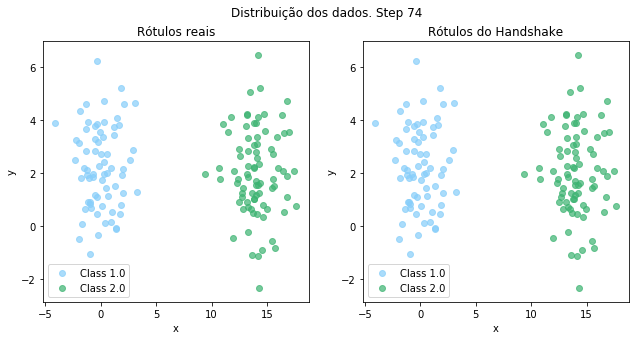

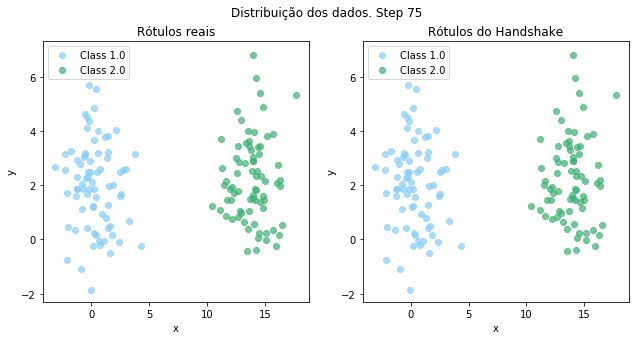

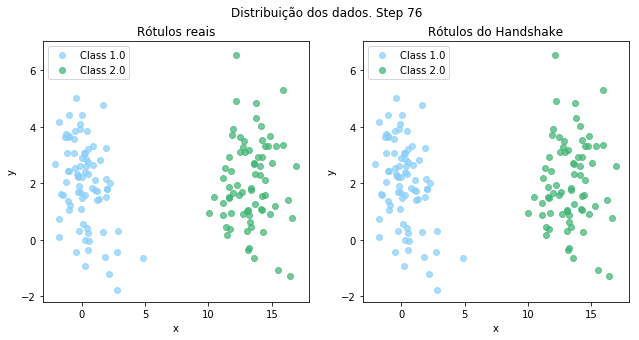

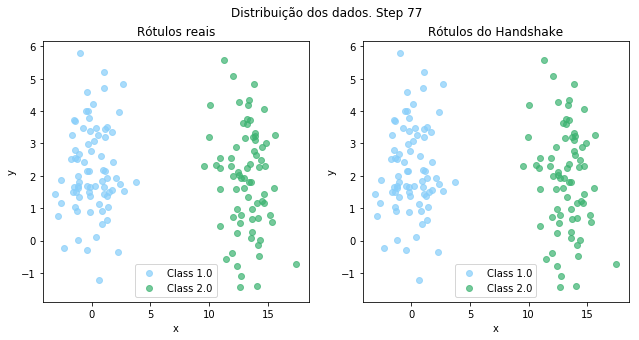

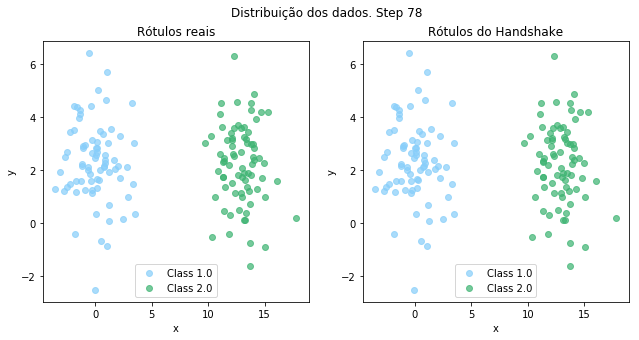

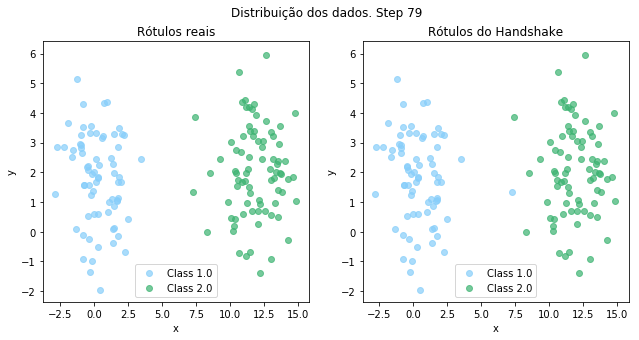

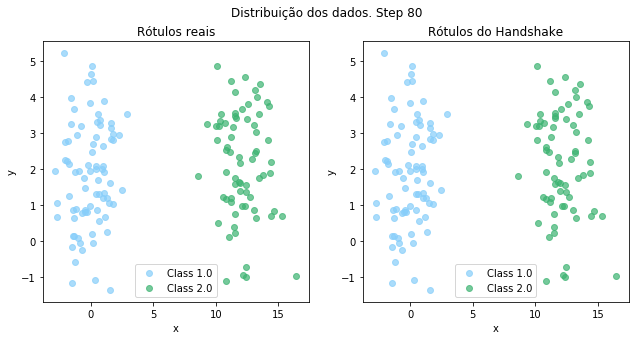

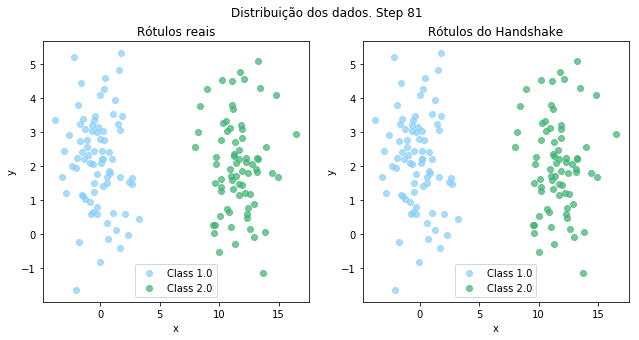

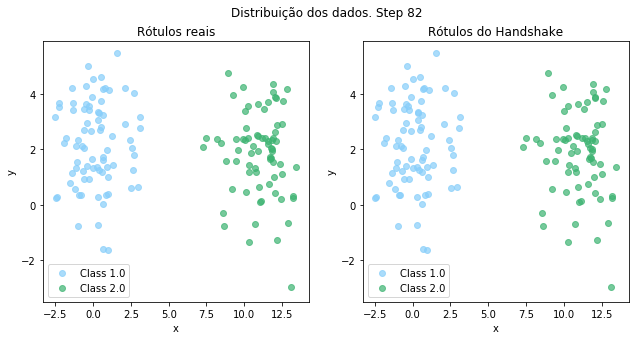

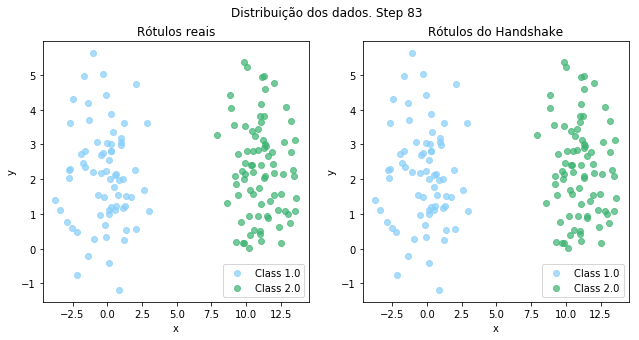

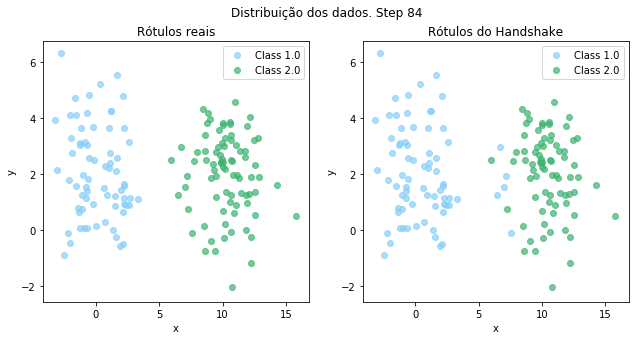

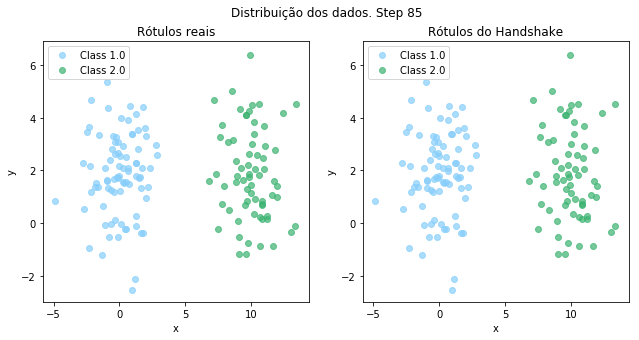

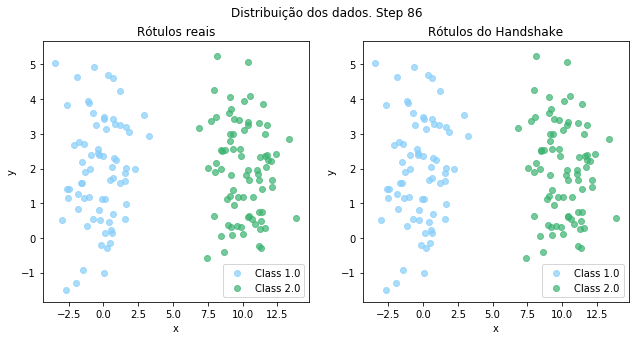

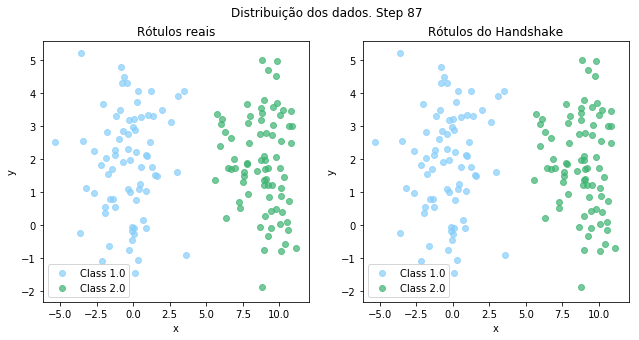

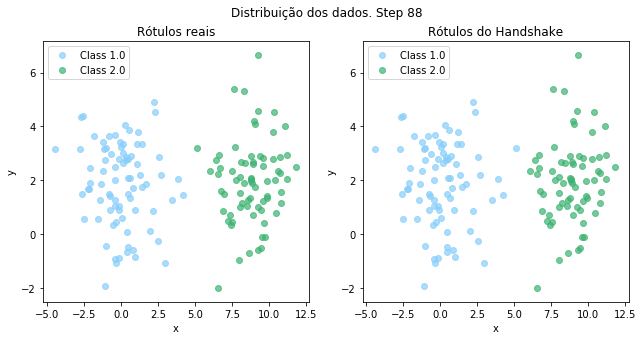

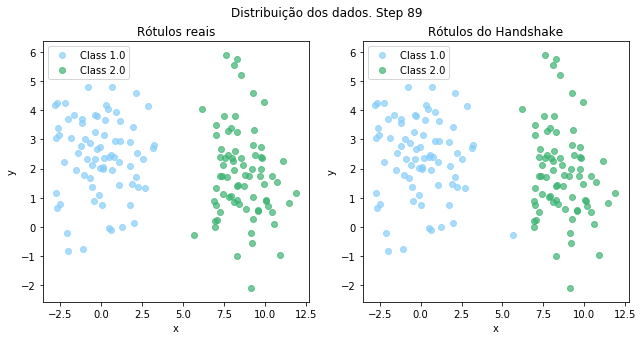

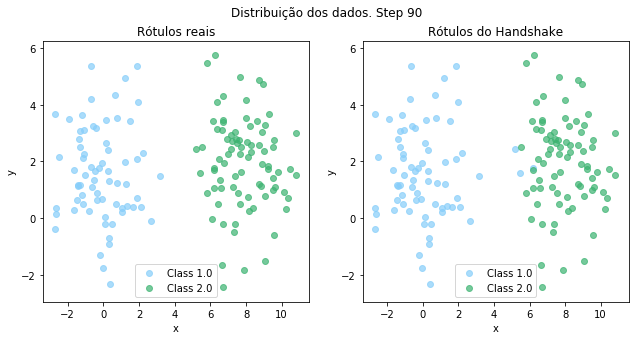

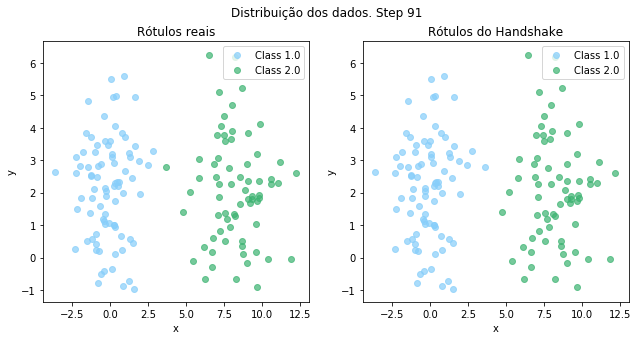

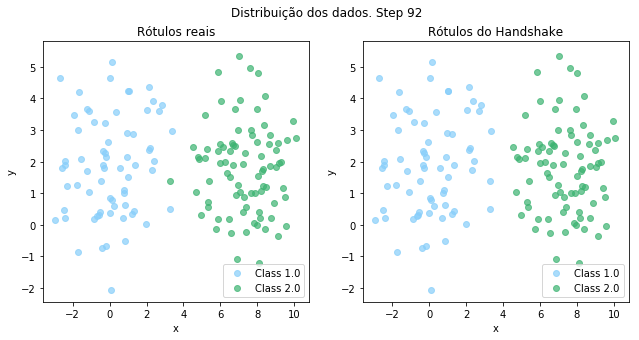

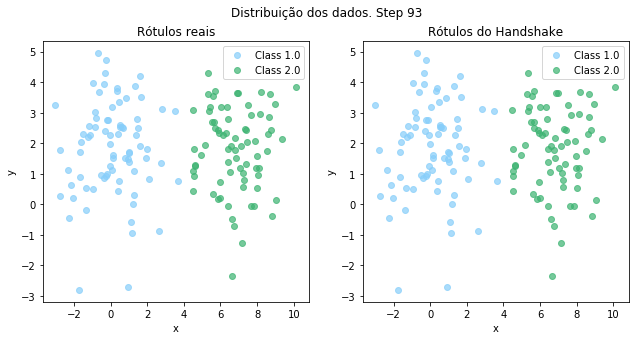

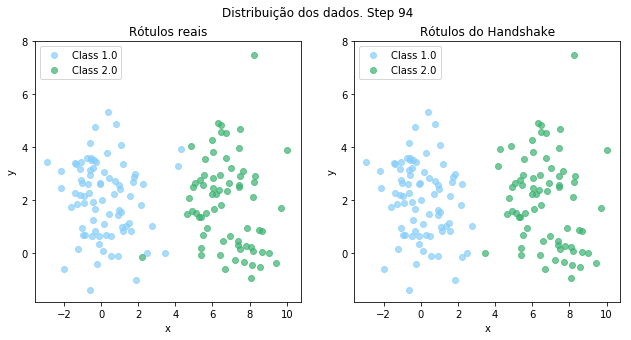

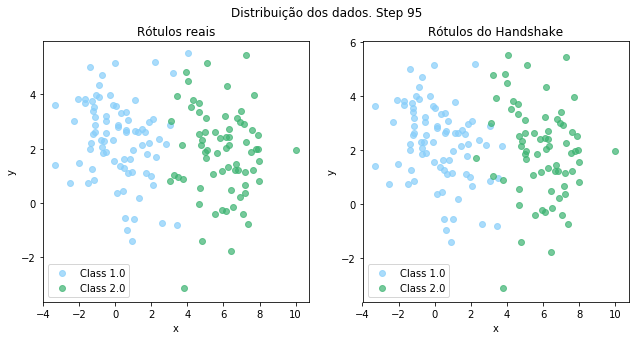

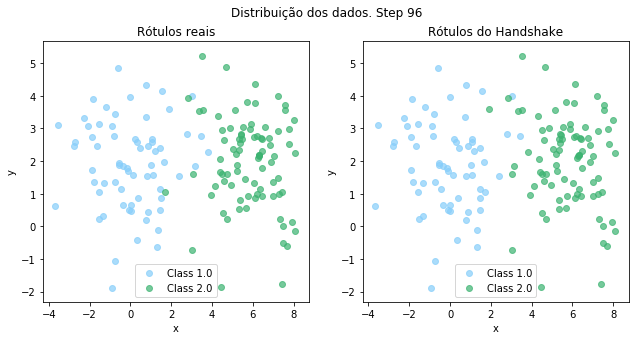

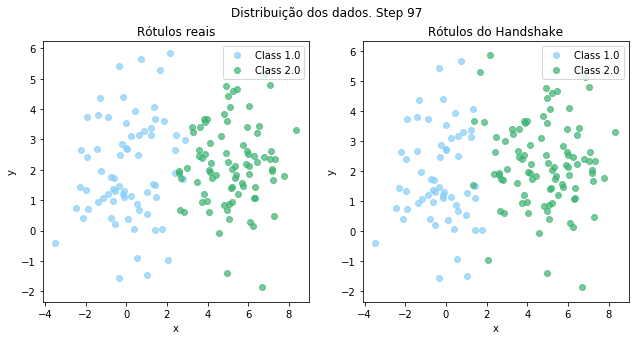

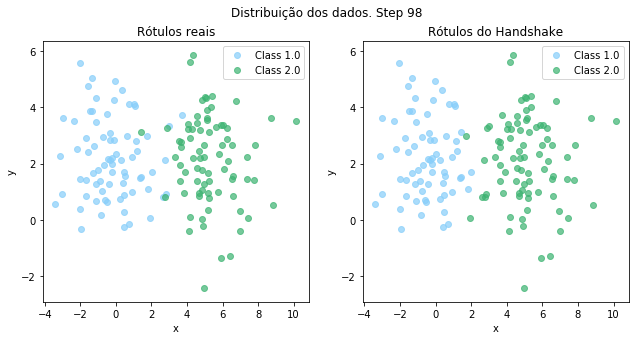

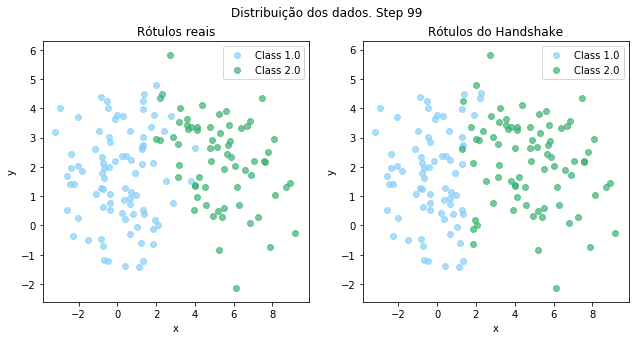

In [8]:
plots.plotPerBatches(stream, predicted, l_stream, len(stream), step)